In [29]:
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Profiling notebook perfomance
from time import clock
start_notebook = clock()

In [30]:
# Open data file
df = pd.read_hdf('data/train.h5')
# df.set_index('id', inplace=True)

# Subsample for now...
df = df[::10]

In [3]:
# df.to_csv('data/train.csv')

In [31]:
excl = ['id', 'sample', 'y', 'timestamp']
cols = [c for c in df.columns if c not in excl]

Thanks to [wangruixin](https://www.kaggle.com/wangruixin/two-sigma-financial-modeling/randomforestregressor)

# Exploration

In [42]:
df.head()

,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
id,,,,,,,,,,,,,,,,,,,,,
10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,-0.179404,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
41,0,0.435826,1.797289,0.363570,-0.005651,0.442866,0.125375,NaN,0.292311,-0.004605,...,0.346018,NaN,NaN,NaN,-0.301422,NaN,NaN,-2.0,NaN,-0.001899
69,0,-0.062361,-0.063724,0.021274,0.032845,0.174025,0.122335,-0.133188,-0.108286,-0.153669,...,-0.390892,NaN,NaN,NaN,-0.438359,NaN,NaN,0.0,NaN,-0.011317
91,0,-0.019409,-0.060192,-0.044959,0.100994,-0.056158,-0.161525,-0.175685,0.422399,0.564602,...,0.178743,NaN,NaN,NaN,-0.341526,NaN,NaN,-2.0,NaN,0.041231
118,0,-0.048108,0.036918,0.182193,0.387648,-0.064894,-0.060405,NaN,-0.380110,-0.354767,...,0.694535,NaN,NaN,NaN,0.347044,NaN,NaN,0.0,NaN,-0.041490


In [43]:
print(df.shape)
print(df.columns)

from collections import Counter
col_prefix = [col.split('_')[0] for col in df.columns]
counter = Counter(col_prefix)
print(counter)

(171076, 110)
Index(['timestamp', 'derived_0', 'derived_1', 'derived_2', 'derived_3',
       'derived_4', 'fundamental_0', 'fundamental_1', 'fundamental_2',
       'fundamental_3',
       ...
       'technical_36', 'technical_37', 'technical_38', 'technical_39',
       'technical_40', 'technical_41', 'technical_42', 'technical_43',
       'technical_44', 'y'],
      dtype='object', length=110)
Counter({'fundamental': 63, 'technical': 40, 'derived': 5, 'y': 1, 'timestamp': 1})


In [44]:
df[['fundamental_0', 'derived_0', 'technical_0']].dropna().describe()

,fundamental_0,derived_0,technical_0
count,160794.000000,160794.000000,1.607940e+05
mean,-0.018864,-3.627990,-1.107823e-01
std,0.250282,222.767597,2.702387e-01
min,-2.251773,-20174.871094,-1.000000e+00
25%,-0.199675,-0.145503,-3.892969e-03
50%,-0.040156,-0.001311,-4.011782e-09
75%,0.133486,0.119618,-3.982083e-26
max,1.376526,3252.490723,0.000000e+00


In [54]:
# Count unique per columns
# nuniq = df.apply(pd.Series.nunique)
# nuniq = df.apply(lambda x: len(x.unique()))  # faster?
# print(nuniq)

# Round number before counting
# df.apply(lambda x: round(x, 3)).nunique()

71

In [ ]:
# Count number of unique per column
# df[['fundamental_0', 'derived_0', 'technical_0']].apply(pd.Series.nunique)

total: 12%


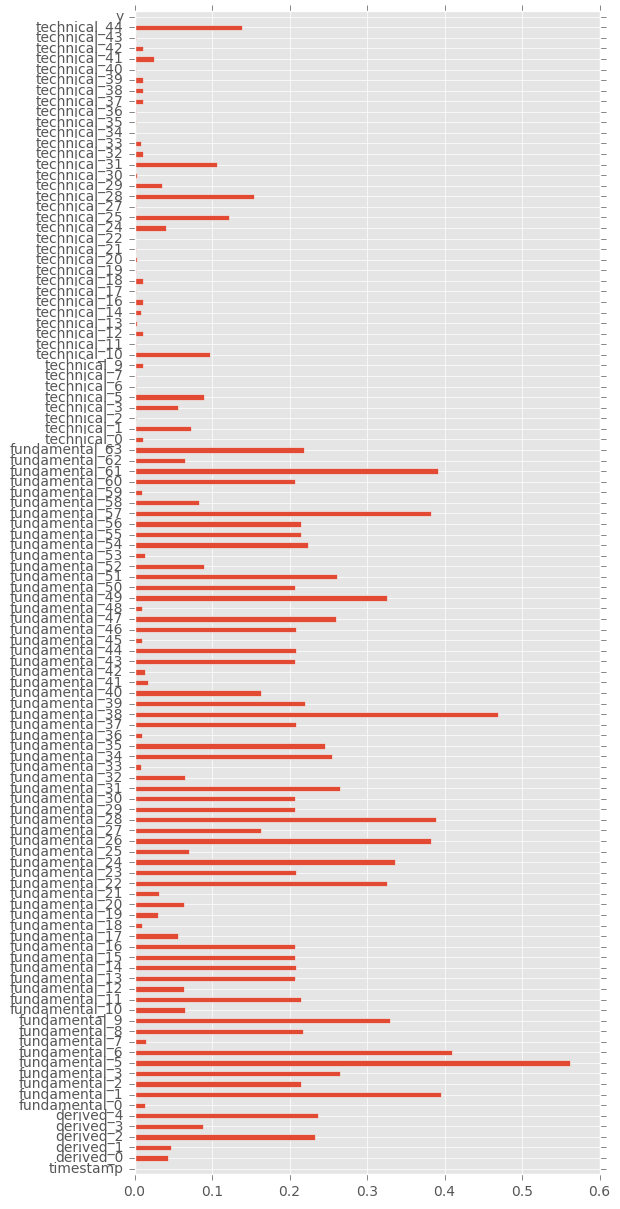

In [5]:
# Number of missing values
n = df.shape[0]
nas = df.isnull().sum()/n
print("total: {:.0%}".format(nas.mean()))

# print(nas * 100)
nas.plot.barh(figsize=(6,15))

# Drop columns with too many missing values
# df.drop(df.columns[nas > 0.3], axis=1, inplace=True)

In [ ]:
# target = df['y']
# df = df[col]

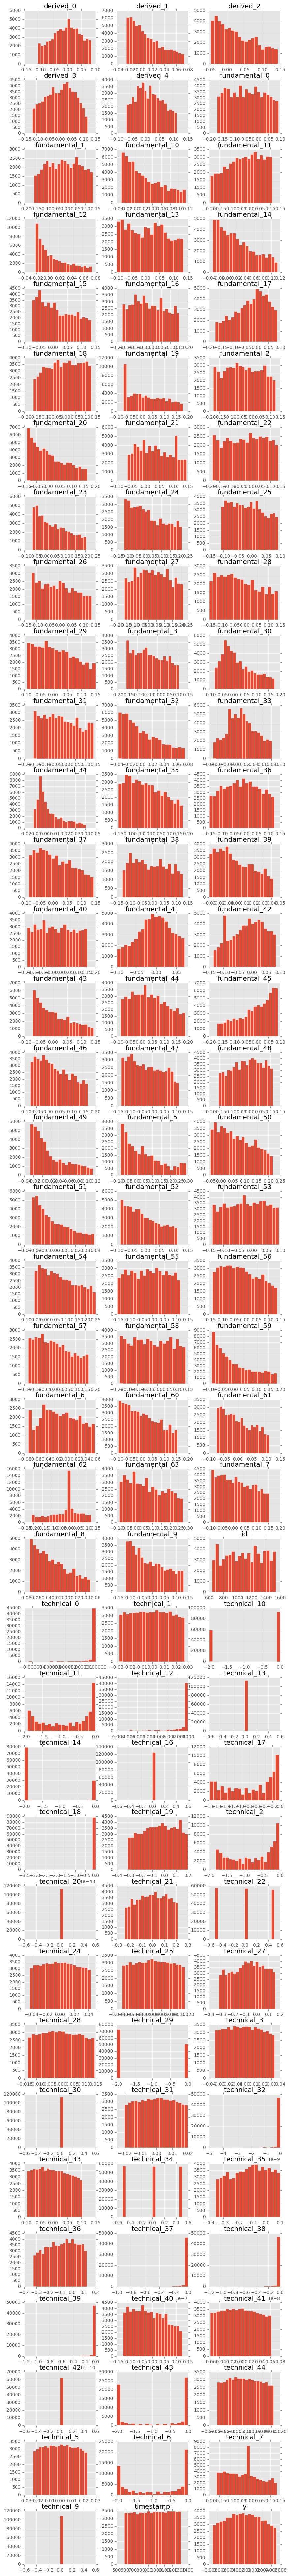

In [56]:
def remove_outliers(col):
    """Remove outliers from column."""
    
    # Ignore missing values
    col = col.dropna()
    
    # First quantile
    q_low = col.quantile(.25)
    q_high = col.quantile(.75)
    q_diff = q_high - q_low
    
    # Add buffer to quantile
    low = q_low - 1.5 * q_diff
    high = q_high + 1.5 * q_diff
    
    # Drop values outside range
    col[(col > high) | (col < low)] = np.nan
    
    return col

# Plot histogram after removing outliers
df.apply(remove_outliers).hist(
    layout=(-1, 3), figsize=(10, 100), bins=20, sharex=False, sharey=False
)

# Columns with thin histograms:
cols_one = ['technical_13', 'technical_16', 'technical_18', 'technical_20', 'technical_30', 'technical_42', 'technical_9', 'technical_10', 'technical_12', 'technical_37', 'technical_38', 'technical_39']
cols_two = ['technical_10', 'technical_29', 'technical_14', 'technical_43', 'technical_6']
cols_three = ['technical_22', 'technical_34']

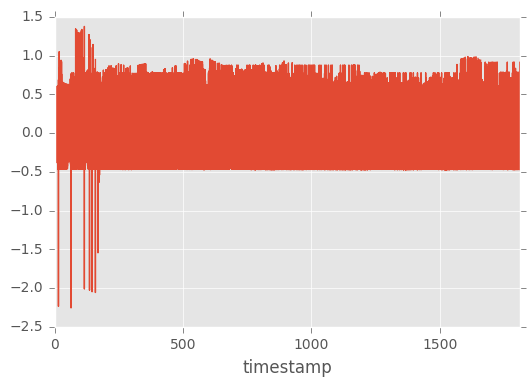

In [46]:
df.set_index('timestamp')['fundamental_0'].plot()

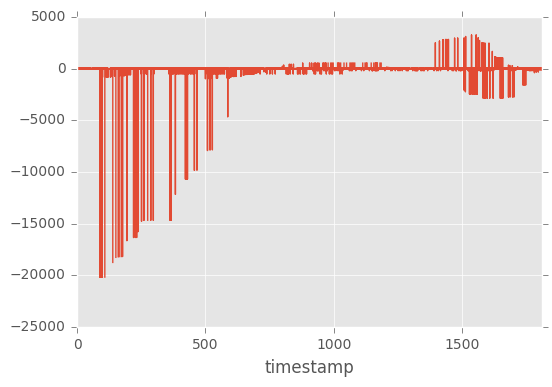

In [47]:
df.set_index('timestamp')['derived_0'].plot()

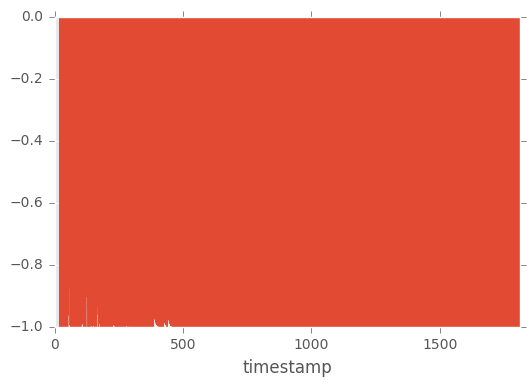

In [48]:
df.set_index('timestamp')['technical_0'].plot()

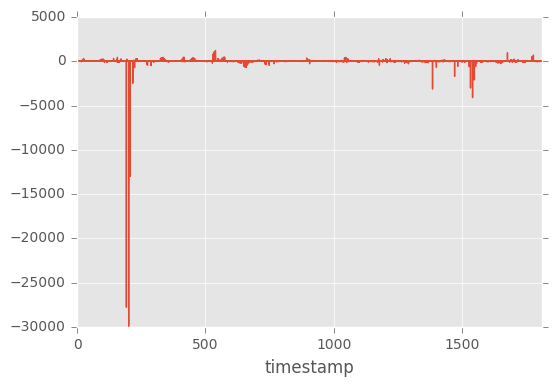

In [49]:
df.set_index('timestamp')['derived_3'].plot()

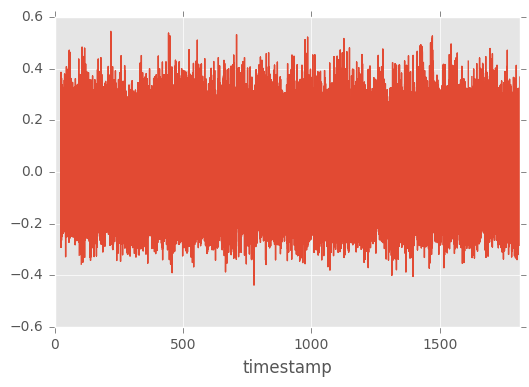

In [50]:
df.set_index('timestamp')['technical_41'].plot()

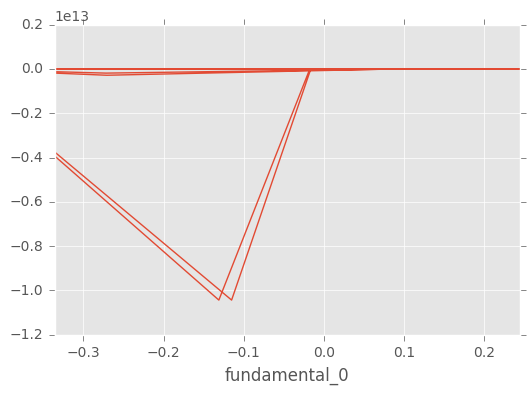

In [51]:
df.set_index('fundamental_0')['fundamental_1'].plot()

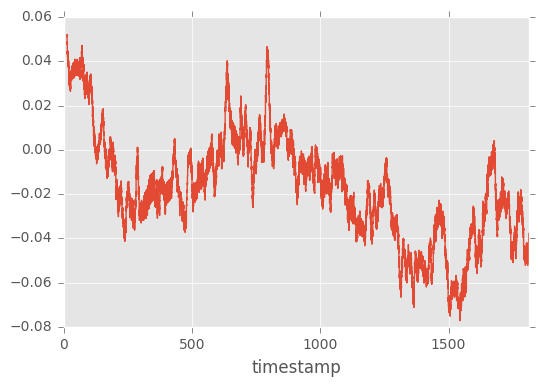

In [52]:
# Seasonal pattern?
series = df.set_index('timestamp')['fundamental_0'].ffill()
series = series.rolling(window=1000).mean()
series.plot()

# Prediction

In [ ]:
target = df['y']
feature = df[cols].ffill().fillna(0)

In [ ]:
def split_train_test(feature, target, cutoff_test = 1000):
    """
    Divide features and targets into train and test
    """

    ind_test = df.index >= cutoff_test
    feature_test = feature[ind_test]
    target_test = target[ind_test]

    ind_train = ~ind_test
    feature_train = feature[ind_train]
    target_train = target[ind_train]
    
    return feature_train, feature_test, target_train, target_test

# Apply split
feature_train, feature_test, target_train, target_test = split_train_test(feature, target)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# LassoCV since L1 norm promotes sparsity of features
clf = LassoCV()
# sfm = SelectFromModel(clf, threshold = 1e-7)
sfm = SelectFromModel(clf, threshold = "mean")
sfm.fit(feature_train, target_train)
# NOTE had to disable mkl as discussed here: https://github.com/BVLC/caffe/issues/3884

feature_kept = feature.columns[sfm.get_support()]
print("Features: {}".format(feature_kept))

In [ ]:
# Keep only most important features
feature_train = pd.DataFrame(sfm.transform(feature_train), 
                             columns = feature_kept, index = feature_train.index)
feature_test = pd.DataFrame(sfm.transform(feature_test), 
                            columns = feature_kept, index = feature_test.index)

In [ ]:
# Linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Quick cross validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(reg, feature, target, cv = 5)
print("R^2 during CV: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std() * 2))

scores

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 10)

reg.fit(feature_train, target_train)
pred_test = reg.predict(feature_test)

In [ ]:
def mape(outcome, predict):
    """
    Compute Mean Absolute Percentage Error (MAPE) score. Positive, but lower is better.
    """
    
    outcome = np.array(outcome).ravel()
    predict = np.array(predict).ravel()
    
    # Get only the NONZERO or NON-NAN elements
    EPSILON = pow(10, -5)
    idx = (np.abs(outcome) > EPSILON) | (~np.isnan(outcome)) | (~np.isnan(predict))
    
    # Extract those elements
    outcome = outcome[np.where(idx)]
    predict = predict[np.where(idx)]
    
    return np.mean(np.abs((outcome - predict) / outcome))

scores = {}

scores['MAPE'] = mape(target_test, pred_test)
        
from sklearn.metrics import r2_score
scores['R2'] = r2_score(target_test, pred_test)

from sklearn.metrics import explained_variance_score
scores['Explained Variance'] = explained_variance_score(target_test, pred_test)

from sklearn.metrics import mean_squared_error
scores['Mean Square Error'] = mean_squared_error(target_test, pred_test)
scores['Root Mean Square Error'] = np.sqrt(scores['Mean Square Error'])
    
from sklearn.metrics import median_absolute_error
scores['Median Absolute Error'] = median_absolute_error(target_test, pred_test)

print(pd.Series(scores))

In [ ]:
print("Notebook ran in {:.1f} minutes".format((clock() - start_notebook)/60))